In [1]:
!wget https://www.dropbox.com/s/cn5hjugm7jq7kme/digit-recognizer.zip?dl=0
!unzip /content/digit-recognizer.zip?dl=0

--2023-04-24 19:16:27--  https://www.dropbox.com/s/cn5hjugm7jq7kme/digit-recognizer.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/cn5hjugm7jq7kme/digit-recognizer.zip [following]
--2023-04-24 19:16:28--  https://www.dropbox.com/s/raw/cn5hjugm7jq7kme/digit-recognizer.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc2dadd0a0e8f2070da623944306.dl.dropboxusercontent.com/cd/0/inline/B6zFmmEAms9sYDDoXrz6_xFbnHlooV2HmPUE_mvmnUP-9xr8psygBaCubE8QERbJjn_OB7f4iuvxA3X9rOkwGg5b_keFbwzmU4-f5nCo5ixgPBoNQ-nTl4qddbMeDihpDHlHN-R1V80sbcN9WU_f_RRoY6jyyX9codVVwu8mf3GMlg/file# [following]
--2023-04-24 19:16:29--  https://uc2dadd0a0e8f2070da623944306.dl.dropboxusercontent.com/cd/0/inline/B6zFmmEAms9sYDDoXrz6_xFbnHlooV2HmPUE_mvmnUP-9xr8psy

In [2]:
import numpy as np
import pandas as pd

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense , Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import Adam ,RMSprop
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

import warnings
# filter warnings
warnings.filterwarnings('ignore')
# Input data files are available in the "../input/" directory.

import os

# Load train data
train = pd.read_csv(r"/content/train.csv")
display(train.head())
print(f"train shape: {train.shape}")

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


train shape: (42000, 785)


In [3]:
# Load test data
test = pd.read_csv(r"/content/test.csv")
display(test.head())
print(f"test shape: {test.shape}")

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


test shape: (28000, 784)


In [4]:
# Put labels into y_train variable
y_train = train["label"]

# Drop "label" column
X_train = train.drop(labels = ["label"],axis = 1) 

In [5]:
def plot_img(index):
    # Reshape vector to 28x28 matrix
    img = X_train.iloc[index].to_numpy()
    img = img.reshape((28,28))

    # Create figure
    fig = px.imshow(img, color_continuous_scale='gray')

    # Set Title and x/y axis labels
    fig.update_layout(
        showlegend = False,
        #coloraxis_showscale=False,
        title={
            'text': f"Visualization of Image No.{index}",
            'y':0.95,
            'x':0.5
        }
    )
    # Display
    fig.show()

In [7]:
# Check some random values from train data
for index in (3, 5, 700):
    plot_img(index)

fig = px.bar(y_train.value_counts(),
             template='simple_white',
             color_discrete_sequence = ['grey']
            )

# Set Title and x/y axis labels
fig.update_layout(
    xaxis = dict(
        tickvals = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    ),
    xaxis_title="Digit",
    yaxis_title="Frequency",
    showlegend = False,
    font = dict(
            size = 14
            ),     
    title={
        'text': "Target Distribution",
        'y':0.95,
        'x':0.5
        }
    )

# Display
fig.show()



In [8]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0

print(f"X_train shape: {X_train.shape}")
print(f"test shape: {test.shape}")

X_train shape: (42000, 784)
test shape: (28000, 784)


In [9]:
# Reshape
X_train = X_train.values.reshape(X_train.shape[0], 28, 28, 1)
test = test.values.reshape(test.shape[0], 28, 28, 1)

print(f"X_train shape: {X_train.shape}")
print(f"test shape: {test.shape}")

X_train shape: (42000, 28, 28, 1)
test shape: (28000, 28, 28, 1)


In [10]:
# One-hot encoding
y_train = to_categorical(y_train, num_classes = 10)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state=11)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")

X_train shape: (33600, 28, 28, 1)
y_train shape: (33600, 10)
X_val shape: (8400, 28, 28, 1)
y_val shape: (8400, 10)


In [11]:
datagen = ImageDataGenerator(
    rotation_range=10,  
    zoom_range = 0.10,  
    width_shift_range=0.1, 
    height_shift_range=0.1
)

datagen.fit(X_train)

# Create CNN
model = Sequential()
        
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Conv2D(filters=32, kernel_size=(5,5),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.1))


model.add(Conv2D(filters=64, kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(filters=64, kernel_size = (3,3),activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Set annealer
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)

# set epochs and batch_size
epochs = 5
batch_size = 128

# Fit the model
history = model.fit(datagen.flow(X_train,y_train, batch_size=batch_size), epochs = epochs, validation_data = (X_val,y_val),verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size,callbacks=[annealer],)


Epoch 1/5
262/262 - 154s - loss: 0.7754 - accuracy: 0.7570 - val_loss: 3.6755 - val_accuracy: 0.3255 - lr: 0.0010 - 154s/epoch - 589ms/step
Epoch 2/5
262/262 - 147s - loss: 0.2439 - accuracy: 0.9270 - val_loss: 0.3605 - val_accuracy: 0.8855 - lr: 9.5000e-04 - 147s/epoch - 562ms/step
Epoch 3/5
262/262 - 147s - loss: 0.1708 - accuracy: 0.9496 - val_loss: 0.0403 - val_accuracy: 0.9881 - lr: 9.0250e-04 - 147s/epoch - 562ms/step
Epoch 4/5
262/262 - 147s - loss: 0.1383 - accuracy: 0.9597 - val_loss: 0.0466 - val_accuracy: 0.9880 - lr: 8.5737e-04 - 147s/epoch - 563ms/step
Epoch 5/5
262/262 - 146s - loss: 0.1199 - accuracy: 0.9657 - val_loss: 0.0424 - val_accuracy: 0.9881 - lr: 8.1451e-04 - 146s/epoch - 558ms/step


In [12]:
history_df = pd.DataFrame(history.history)

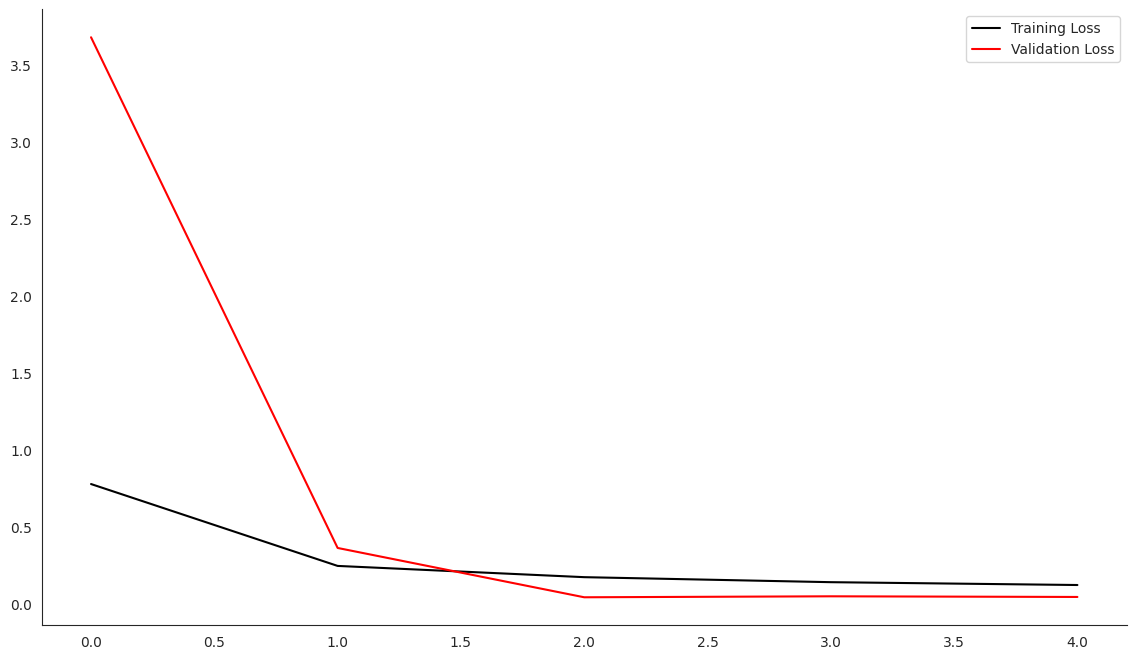

Minimum validation loss: 0.04030037298798561


In [13]:
plt.figure(figsize = (14, 8))
sns.set_style('white')

plt.plot(history.history['loss'], color='k', label="Training loss")
plt.plot(history.history['val_loss'], color='r', label="Validation loss")

plt.legend(['Training Loss', 'Validation Loss'])

sns.despine()
plt.show()

print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

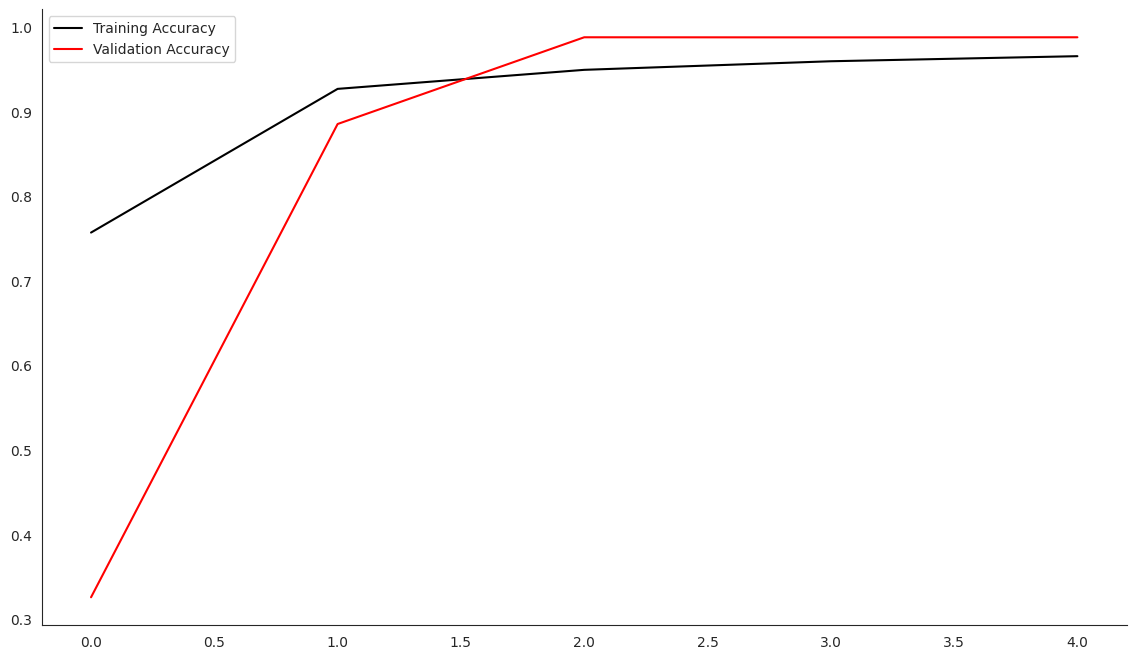

Maximum validation accuracy: 0.988095223903656


In [14]:
plt.figure(figsize = (14, 8))
sns.set_style('white')

plt.plot(history.history['accuracy'], color='k', label="Training accuracy")
plt.plot(history.history['val_accuracy'], color='r', label="Validation accuracy")

plt.legend(['Training Accuracy', 'Validation Accuracy'])

sns.despine()
plt.show()

print("Maximum validation accuracy: {}".format(history_df['val_accuracy'].max()))

In [15]:
# predict results
results = model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

875/875 [==============================] - 24s 27ms/step


In [16]:
submissions=pd.DataFrame({"ImageId": list(range(1,len(results)+1)),
                         "Label": results})
submissions.to_csv("submission.csv", index=False, header=True)